## 1. Install GPyOpt

---------------------------------------------------------------------------
### There are a number of dependencies that you need to install (using pip). Three of them are needed to ensure the good behaviour of the package:
- GPy (>=1.0.8) 
- numpy (>=1.7)
- scipy (>=0.16)

### Command:
* $ pip install GPt

* $ pip install numpy

* $ pip install scipy

### After these three packages has been installed, we can download GPyOpt
* $ pip install gpyopt

## 2. How to use GPyOpt?

In [1]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [2]:
def myf(x):
    return (x)**2

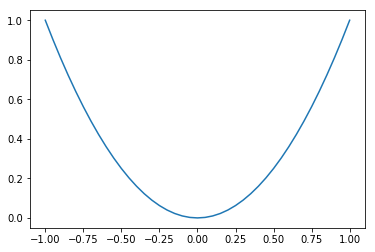

In [3]:
import numpy as np
x = np.arange(-1, 1.05, 0.05)
plot(x, myf(x))

In [4]:
bounds = [{'name': 'var_1', 'domain': (-1,1)}]

In [17]:
max_iter = 10

In [18]:
myProblem = GPyOpt.methods.BayesianOptimization(myf,bounds)

In [19]:
myProblem.run_optimization(max_iter)

In [20]:
myProblem.x_opt

array([0.00224798])

In [21]:
myProblem.fx_opt

5.053436286151084e-06

## 3. Another example (one dimension)
In this example we show how GPyOpt works in a one-dimensional example a bit more difficult that the one we analyzed in Section 3. Let's consider here the Forrester function

$$f(x)=(6x−2)^2\sin (12x−4)$$

defined on the interval $[0,1]$

The minimum of this function is located at xmin=0.78. The Forrester function is part of the benchmark of functions of GPyOpt.

In [23]:
# Create the true and perturbed Forrester function and the boundaries of the problem
f_true= GPyOpt.objective_examples.experiments1d.forrester()          # noisy version
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]  # problem constraints 

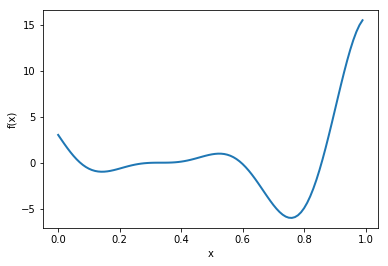

In [30]:
f_true.plot()

In [31]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f,            # function to optimize       
                                             domain=bounds,        # box-constraints of the problem
                                             acquisition_type='EI',
                                             exact_feval = True) # Selects the Expected improvement

In [32]:
# Run the optimization
max_iter = 10     # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between two observations

myBopt.run_optimization(max_iter, max_time, eps)

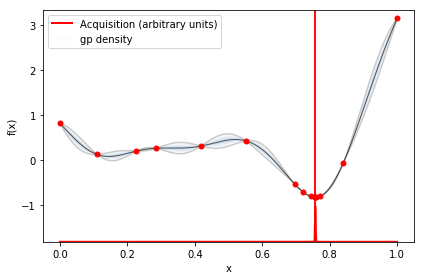

In [33]:
myBopt.plot_acquisition()

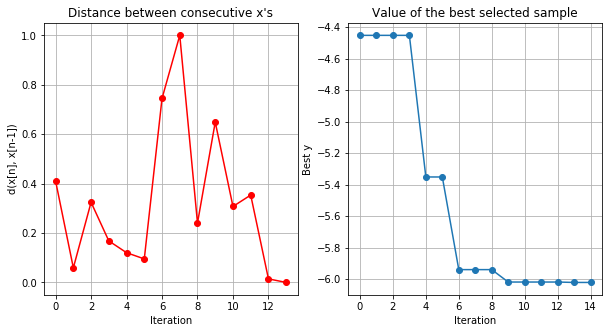

In [34]:
myBopt.plot_convergence()

### Plot acquisition function in every iteration

In [ ]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f,            # function to optimize       
                                             domain=bounds,        # box-constraints of the problem
                                             acquisition_type='EI',
                                             exact_feval = True) # Selects the Expected improvement

In [ ]:
for i in range(max_iter):
    myBopt.run_optimization(1, max_time, eps)
    myBopt.plot_acquisition()

## 4. Another example (two dimension)
In this case we minimize the use the Six-hump camel function

$$f(x_1,x_2)=\Big(4−2.1x^2_1 + \frac{x^4_1}{3} \Big)x^2_1+x_1x_2+(−4+4x^2_2)x^2_2$$

in $[−1,1]×[−2,2]$. This functions has two global minimum, at $(0.0898,−0.7126)$ and $(−0.0898,0.7126)$.

In [ ]:
# create the object function
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]

In [ ]:
f_true.plot()

In [ ]:
f_sim.plot()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def f(x1,x2):
    term1 = (4-2.1*x1**2+(x1**4)/3)*x1**2
    term2 = x1*x2
    term3 = (-4+4*x2**2)*x2**2
    fval = term1 + term2 + term3
    return fval

fig = plt.figure()
ax = fig.gca(projection='3d')

#make data
x1 = np.arange(-2,2,0.01)
x2 = np.arange(-1,1,0.01)
x1, x2 = np.meshgrid(x1, x2)
Y = f(x1,x2)

#plot the surface
surf = ax.plot_surface(x1,x2,Y, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Creates three identical objects that we will later use to compare the optimization strategies 
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)

In [ ]:
# runs the optimization for the three methods
max_iter = 30  # maximum time 40 iterations
max_time = 60  # maximum time 60 seconds

myBopt2D.run_optimization(max_iter,max_time,verbosity=False)     

In [ ]:
myBopt2D.plot_acquisition()

In [ ]:
myBopt2D.plot_convergence()

In [ ]:
myBopt2D.x_opt

In [ ]:
myBopt2D.fx_opt

### Plot acquisition function in every iteration

In [ ]:
# Creates three identical objects that we will later use to compare the optimization strategies 
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)

In [ ]:
for i in range(max_iter):
    myBopt2D.run_optimization(1,max_time,verbosity=False)
    if i % 5 == 0:
        myBopt2D.plot_acquisition()

In [ ]:
myBopt2D.plot_convergence()

In [ ]:
myBopt2D.x_opt

In [ ]:
myBopt2D.fx_opt

## Reference
GPyOpt web: https://sheffieldml.github.io/GPyOpt/